In [1]:
%matplotlib notebook
import sys
sys.path.insert(1, '../../../script/')

In [2]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
import cleaning as cl
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('../../data/training.csv') 

In [5]:
cl.cleaning(df)

In [6]:
df.columns

Index(['IsBadBuy', 'VehicleAge', 'Transmission', 'WheelTypeID', 'VehOdo',
       'Nationality', 'Size', 'MMRAcquisitionAuctionAveragePrice', 'VNST',
       'VehBCost', 'WarrantyCost'],
      dtype='object')

In [7]:
X = df[["VehBCost", "WarrantyCost", "MMRAcquisitionAuctionAveragePrice"]]
print(X.head())

   VehBCost  WarrantyCost  MMRAcquisitionAuctionAveragePrice
0    6100.0           533                             6100.0
1    4000.0          1630                             4000.0
2    7500.0           693                             7500.0
3    4725.0          1633                             4725.0
4    5670.0          1623                             5670.0


<h1>Clustering Preprocessing - Normalization</h1>

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<p>StandardScalar</p>

In [8]:
scaler = StandardScaler()
scaler.fit(X.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaler.transform(X.values)

array([[-0.39652019, -1.41977609, -0.39652019],
       [-1.62906564,  0.80082911, -1.62906564],
       [ 0.42517677, -1.09589566,  0.42517677],
       ...,
       [ 0.13171357,  0.94859956,  0.13171357],
       [-0.73400288, -1.29629667, -0.73400288],
       [-2.07512971,  0.44658489, -2.07512971]])

In [10]:
X = scaler.transform(X.values)

<h1>Hierarchical Clustering</h1>

In [8]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

<h2>Con 8 MMR</h2>

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
Z = df[["MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice",
        "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice",
        "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice"]]

In [31]:
scaler = MinMaxScaler()
Z = scaler.fit_transform(Z.values)

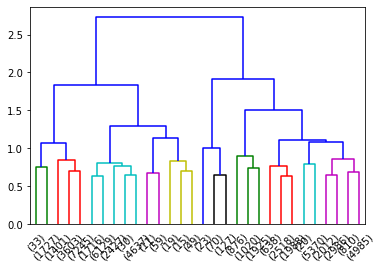

In [32]:
data_dist = pdist(Z, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res_1 = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

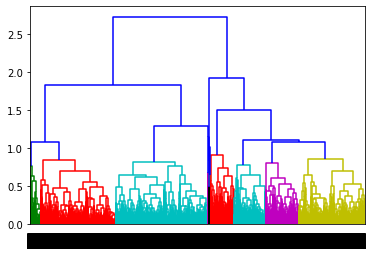

In [33]:
res_2 = dendrogram(data_link, color_threshold=1.0)

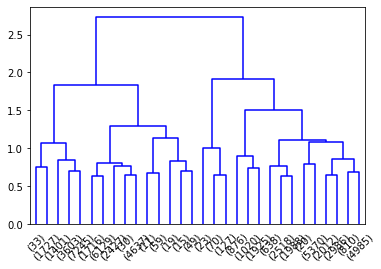

In [34]:
#data_dist = pdist(Z, metric='euclidean')
data_link_3 = linkage(data_dist, method='single', metric='euclidean')
res_3 = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

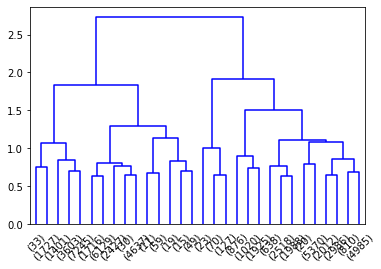

In [35]:
#data_dist = pdist(X, metric='euclidean')
data_link_4 = linkage(data_dist, method='average', metric='euclidean')
res_4 = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')